# Import packages and data

In [11]:
import numpy as np
import pandas as pd

from keras.utils import  np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()   # x 表示feature (圖形)   y 表示label (標籤)

### Converting pictures from (28,28) to (28,28,1) since the pictures are in grayscale

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train=x_train.reshape(60000,28,28,1)   #有60000筆資料 每一筆為28*28
x_test=x_test.reshape(10000,28,28,1)

In [15]:
x_train[1234].shape

(28, 28, 1)

In [16]:
X=x_train[1234][:,:,0]
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        255, 129,  37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 149,
        253, 252, 215,  60,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53,
        150, 249, 252, 252,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

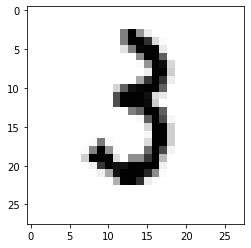

In [17]:
plt.imshow(X, cmap='Greys')

## One hot encoding
Classify the numbers to ten baskets, 1 -> yes , 0 -> no


In [18]:
from keras.utils import np_utils

In [19]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

##  CNN


In [20]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout


## Build up CNN

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))   #filter 個數 , filter大小 3x3 ,padding =輸出大小一樣是28x28
model.add(Activation('relu'))                                      #只有第一次要打input_shape，給定輸入圖片大小

32 filters generate pictures of 32 * 28 * 28


In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

maxpooling makes pictures to 32 *14 * 14


In [24]:
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

## 2nd

64 pictures of 14 *14

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

64 pictures of  7 * 7

## 3rd

In [26]:
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))

128 pictures of  7 * 7

In [27]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Dropout(0.2))    #dropout layer avoid overfitting

In [29]:
model.add(Flatten())   #flatten layer makes pictures to one-dim array
model.add(Dense(200))  #hidden layer have 200 neurals 
model.add(Activation('relu'))

In [30]:
model.add(Dense(10))
model.add(Activation('softmax'))

# Define training rules

In [31]:
model.compile(loss='categorical_crossentropy',
       optimizer='adam',
       metrics=['accuracy'])

## NN INFO

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [33]:
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
600/600 [==============================] - 35s 4ms/step - loss: 2.1085 - accuracy: 0.8085
Epoch 2/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9807
Epoch 3/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 4/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0398 - accuracy: 0.9871
Epoch 5/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0339 - accuracy: 0.9892
Epoch 6/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 7/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0245 - accuracy: 0.9919
Epoch 8/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 9/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 10/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0195 - accuracy: 0.993

## Score

In [34]:
score=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9894


In [35]:
print('loss:',score[0])
print('acc:',score[1])

loss: 0.03804533928632736
acc: 0.9894000291824341


## Save result

In [36]:
model_json=model.to_json()
open('handwriting_model_cnn.json','w').write(model_json)
model.save_weights('handwriting_model.h5')

## Show result

In [37]:
predict = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


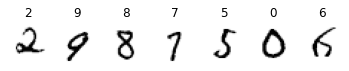

In [38]:
pick=np.random.randint(1,9999,7)

for i in range(7):
    plt.subplot(1,7,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')